In [ ]:
# download TA-Lib 
!wget -q http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 2>&1 > /dev/null
!tar xvzf ta-lib-0.4.0-src.tar.gz 2>&1 > /dev/null

import os

os.chdir('ta-lib') # Can't use !cd in co-lab

!./configure --prefix=/usr 2>&1 > /dev/null
!make 2>&1 > /dev/null
!make install 2>&1 > /dev/null

os.chdir('../')

!pip install TA-Lib 2>&1 > /dev/null

import talib

./configure: line 4354: /usr/bin/file: No such file or directory


In [ ]:
import talib
import numpy as np
import scipy 
import statistics

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

import seaborn as sns
import math

In [ ]:
pd.plotting.register_matplotlib_converters()


In [ ]:
PATH = "/content/drive/MyDrive/aphrodite/BTCUSDT-1h-data.csv"

In [ ]:
data = pd.read_csv(PATH)

In [ ]:
data.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore'],
      dtype='object')

In [ ]:
data.timestamp = pd.to_datetime(data.timestamp)

In [ ]:
data

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
0,2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,1502945999999,2.023661e+05,171,35.160503,1.509525e+05,7887.635513
1,2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,1502949599999,1.003048e+05,102,21.448071,9.260828e+04,8039.262402
2,2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,1502953199999,3.128231e+04,36,4.802861,2.079532e+04,8041.760498
3,2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,1502956799999,1.924106e+04,25,2.602292,1.129135e+04,8048.127886
4,2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,1502960399999,4.239504e+03,28,0.814655,3.552747e+03,8018.036500
...,...,...,...,...,...,...,...,...,...,...,...,...
31240,2021-03-15 15:00:00,56134.09,56816.69,55854.20,56224.13,4402.384401,1615823999999,2.479985e+08,96774,2407.067273,1.356062e+08,0.000000
31241,2021-03-15 16:00:00,56224.14,56700.00,55669.28,56247.87,4462.956112,1615827599999,2.510751e+08,153182,2259.944065,1.271267e+08,0.000000
31242,2021-03-15 17:00:00,56261.02,56331.11,55478.01,56035.79,3315.713786,1615831199999,1.852996e+08,116860,1603.267063,8.960495e+07,0.000000
31243,2021-03-15 18:00:00,56034.82,56377.66,55800.00,56113.90,2345.779168,1615834799999,1.315995e+08,64657,1239.803615,6.954872e+07,0.000000


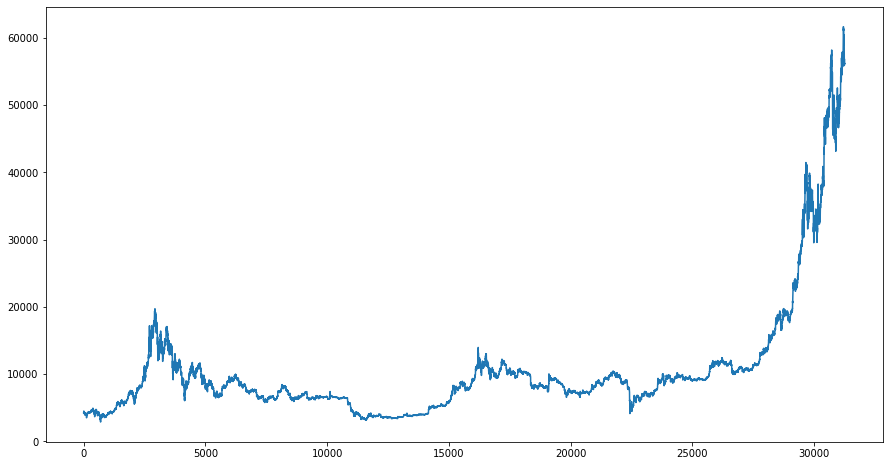

In [ ]:
plt.figure(figsize = (15, 8))
plt.plot(data.open)

In [ ]:
print(pd.DataFrame(data.describe()))

               open          high  ...   tb_quote_av        ignore
count  31245.000000  31245.000000  ...  3.124500e+04  31245.000000
mean   10463.881285  10532.444929  ...  1.279003e+07   1943.395681
std     8894.957027   8974.376620  ...  2.389214e+07   7635.799356
min     2870.900000   2950.000000  ...  0.000000e+00      0.000000
25%     6449.970000   6475.000000  ...  3.043069e+06      0.000000
50%     8334.290000   8375.000000  ...  5.883452e+06      0.000000
75%    10556.220000  10612.970000  ...  1.153094e+07      0.000000
max    61648.260000  61844.000000  ...  6.363879e+08  79920.622111

[8 rows x 11 columns]


In [ ]:
data_ = data.copy()
data_.set_index("timestamp",inplace = True)

In [ ]:
train = data_["2019-01-01":"2020-12-31"]
test = data_["2020-12-31":]

In [ ]:
test.reset_index()

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
0,2020-12-31 00:00:00,28875.55,29300.00,28869.78,29120.51,5524.788189,1609376399999,1.610427e+08,100654,3116.018798,9.081461e+07,0.0
1,2020-12-31 01:00:00,29120.50,29177.41,28120.67,28743.57,6991.539806,1609379999999,1.998865e+08,132055,3018.861713,8.629391e+07,0.0
2,2020-12-31 02:00:00,28743.58,28792.76,28600.38,28720.49,1906.355789,1609383599999,5.472092e+07,43654,890.811568,2.557282e+07,0.0
3,2020-12-31 03:00:00,28720.48,29147.75,28711.06,29024.00,2583.086498,1609387199999,7.476053e+07,50394,1435.154158,4.153135e+07,0.0
4,2020-12-31 04:00:00,29024.01,29185.00,28824.61,29028.35,2767.843373,1609390799999,8.032640e+07,59446,1377.859404,3.998842e+07,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1789,2021-03-15 15:00:00,56134.09,56816.69,55854.20,56224.13,4402.384401,1615823999999,2.479985e+08,96774,2407.067273,1.356062e+08,0.0
1790,2021-03-15 16:00:00,56224.14,56700.00,55669.28,56247.87,4462.956112,1615827599999,2.510751e+08,153182,2259.944065,1.271267e+08,0.0
1791,2021-03-15 17:00:00,56261.02,56331.11,55478.01,56035.79,3315.713786,1615831199999,1.852996e+08,116860,1603.267063,8.960495e+07,0.0
1792,2021-03-15 18:00:00,56034.82,56377.66,55800.00,56113.90,2345.779168,1615834799999,1.315995e+08,64657,1239.803615,6.954872e+07,0.0


In [ ]:
train_close_mean = train.close.mean()
train_close_std = train.close.std()
test_close_mean = test.close.mean()
test_close_std = test.close.std()

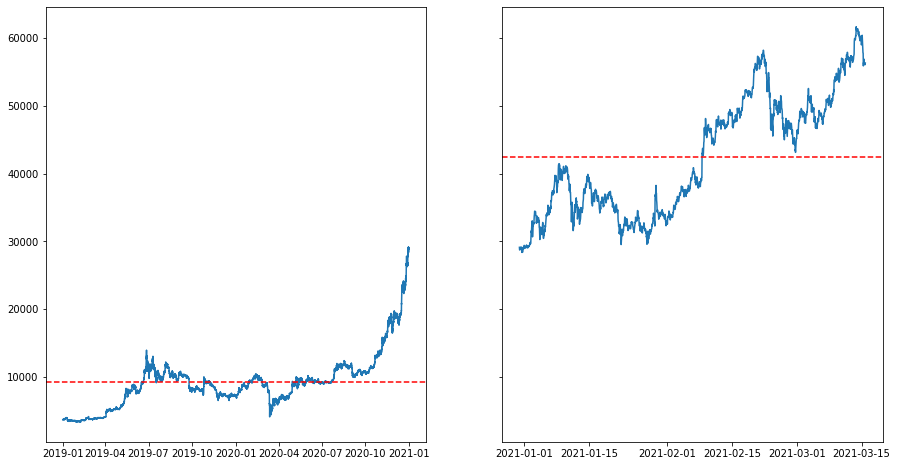

In [ ]:
fig, axs = plt.subplots(1,2, sharey = True, figsize = (15,8))

axs[0].plot(train.close)
axs[0].axhline(train_close_mean, color = "red", ls = "--" )
axs[1].plot(test.close)
axs[1].axhline(test_close_mean, color = "red", ls = "--" )
plt.show()

In [ ]:
whole = train.append(test, ignore_index=False)

In [ ]:
print("Train: ", scipy.stats.stats.kurtosis(train.close))
print("Test:", scipy.stats.stats.kurtosis(test.close))
print("Whole: ", scipy.stats.stats.kurtosis(whole.close)) 


Train:  4.287601600661495
Test: -1.1895839172851377
Whole:  6.136365241339233


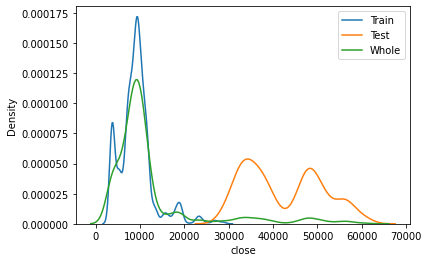

In [ ]:
sns.kdeplot(train.close, label = "Train")
sns.kdeplot(test.close, label = "Test")
sns.kdeplot(whole.close, label = "Whole")
plt.legend()

In [ ]:
close_log = [math.log(x) for x in whole.close]
close_norm = whole.close

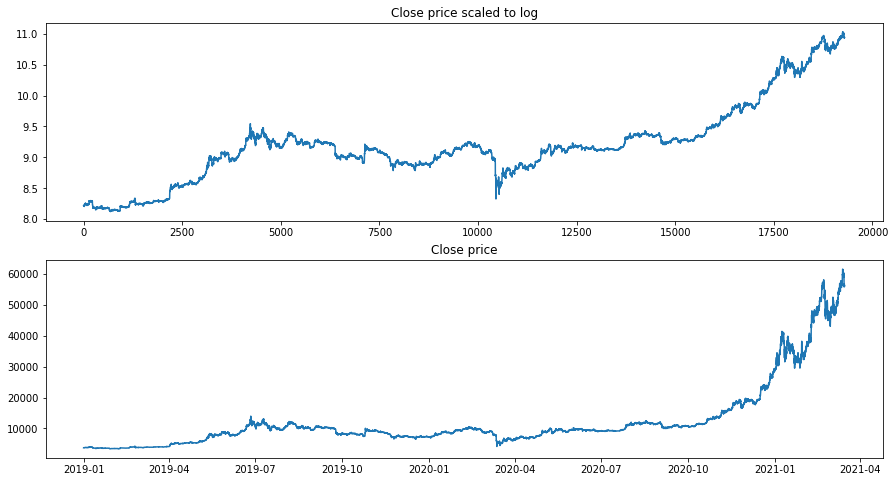

In [ ]:
fig, axs = plt.subplots(2, 1, figsize = (15,8))
axs[0].title.set_text("Close price scaled to log")
axs[0].plot(close_log)

axs[1].title.set_text("Close price")
axs[1].plot(whole.close)


plt.show()

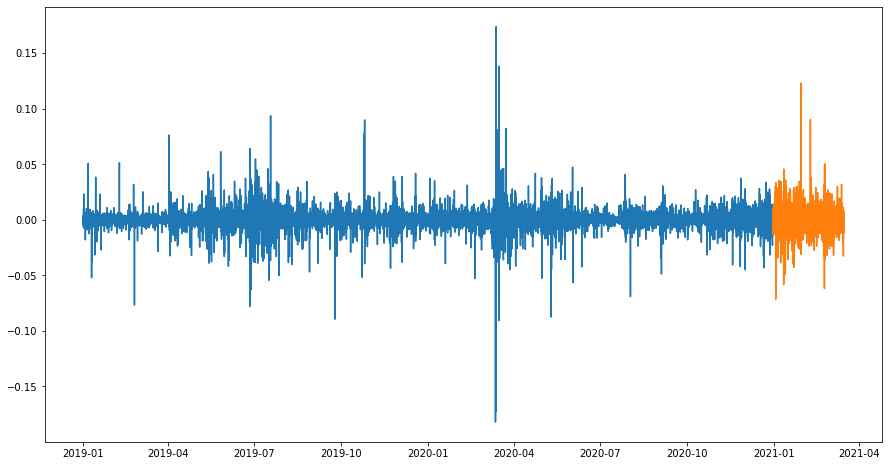

In [ ]:
fig, axs = plt.subplots(1,1, figsize = (15,8 ))
plt.plot(train.close.pct_change())
plt.plot(test.close.pct_change())

In [ ]:
whole.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
open,19293.0,1.229527e+04,1.068986e+04,3.366630e+03,7.304480e+03,9.305000e+03,1.136888e+04,6.164826e+04
high,19293.0,1.236909e+04,1.078655e+04,3.386970e+03,7.335000e+03,9.338810e+03,1.140899e+04,6.184400e+04
low,19293.0,1.221567e+04,1.058769e+04,3.349920e+03,7.267420e+03,9.269750e+03,1.132591e+04,6.108998e+04
close,19293.0,1.229799e+04,1.069437e+04,3.366410e+03,7.304510e+03,9.305020e+03,1.136934e+04,6.164826e+04
volume,19293.0,2.497916e+03,2.407937e+03,0.000000e+00,1.112017e+03,1.822034e+03,2.983492e+03,4.725576e+04
close_time,19293.0,1.581122e+12,2.008685e+10,1.546304e+12,1.563725e+12,1.581131e+12,1.598537e+12,1.615838e+12
quote_av,19293.0,3.643435e+07,5.824961e+07,0.000000e+00,8.728403e+06,1.689143e+07,3.570875e+07,1.252120e+09
trades,19293.0,3.205739e+04,3.277961e+04,0.000000e+00,1.201800e+04,2.078700e+04,3.874300e+04,5.548760e+05
tb_base_av,19293.0,1.238906e+03,1.186321e+03,0.000000e+00,5.616277e+02,8.990904e+02,1.482403e+03,2.062879e+04
tb_quote_av,19293.0,1.802751e+07,2.906030e+07,0.000000e+00,4.401078e+06,8.291020e+06,1.744152e+07,6.363879e+08


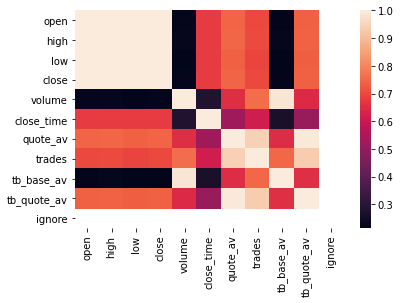

In [ ]:
sns.heatmap(whole.corr())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


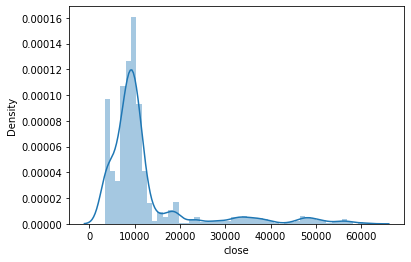

In [ ]:
sns.distplot(whole.close)

5*24h bollinger bands

In [ ]:
upper, middle, lower = talib.BBANDS(whole.close, 5*24)

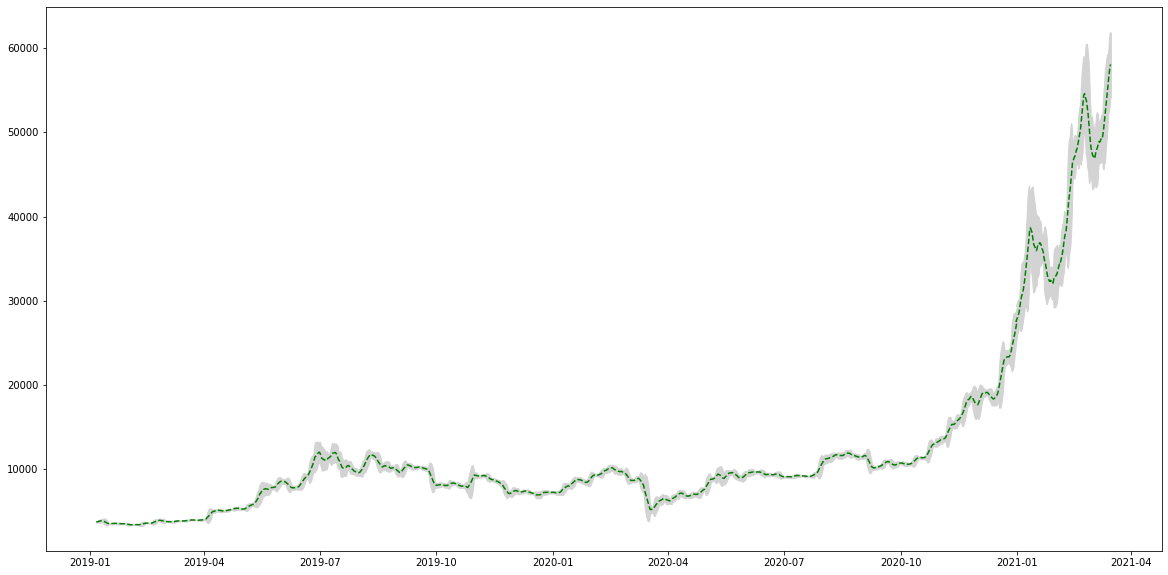

In [ ]:
fig = plt.figure(figsize = (20, 10))
x_axis = whole.index.get_level_values(0)
#plt.plot(x_axis, whole.close, color = "red")
plt.plot(x_axis, middle, color = "green", ls ="--")
plt.fill_between(x_axis, upper, lower, color='lightgrey')


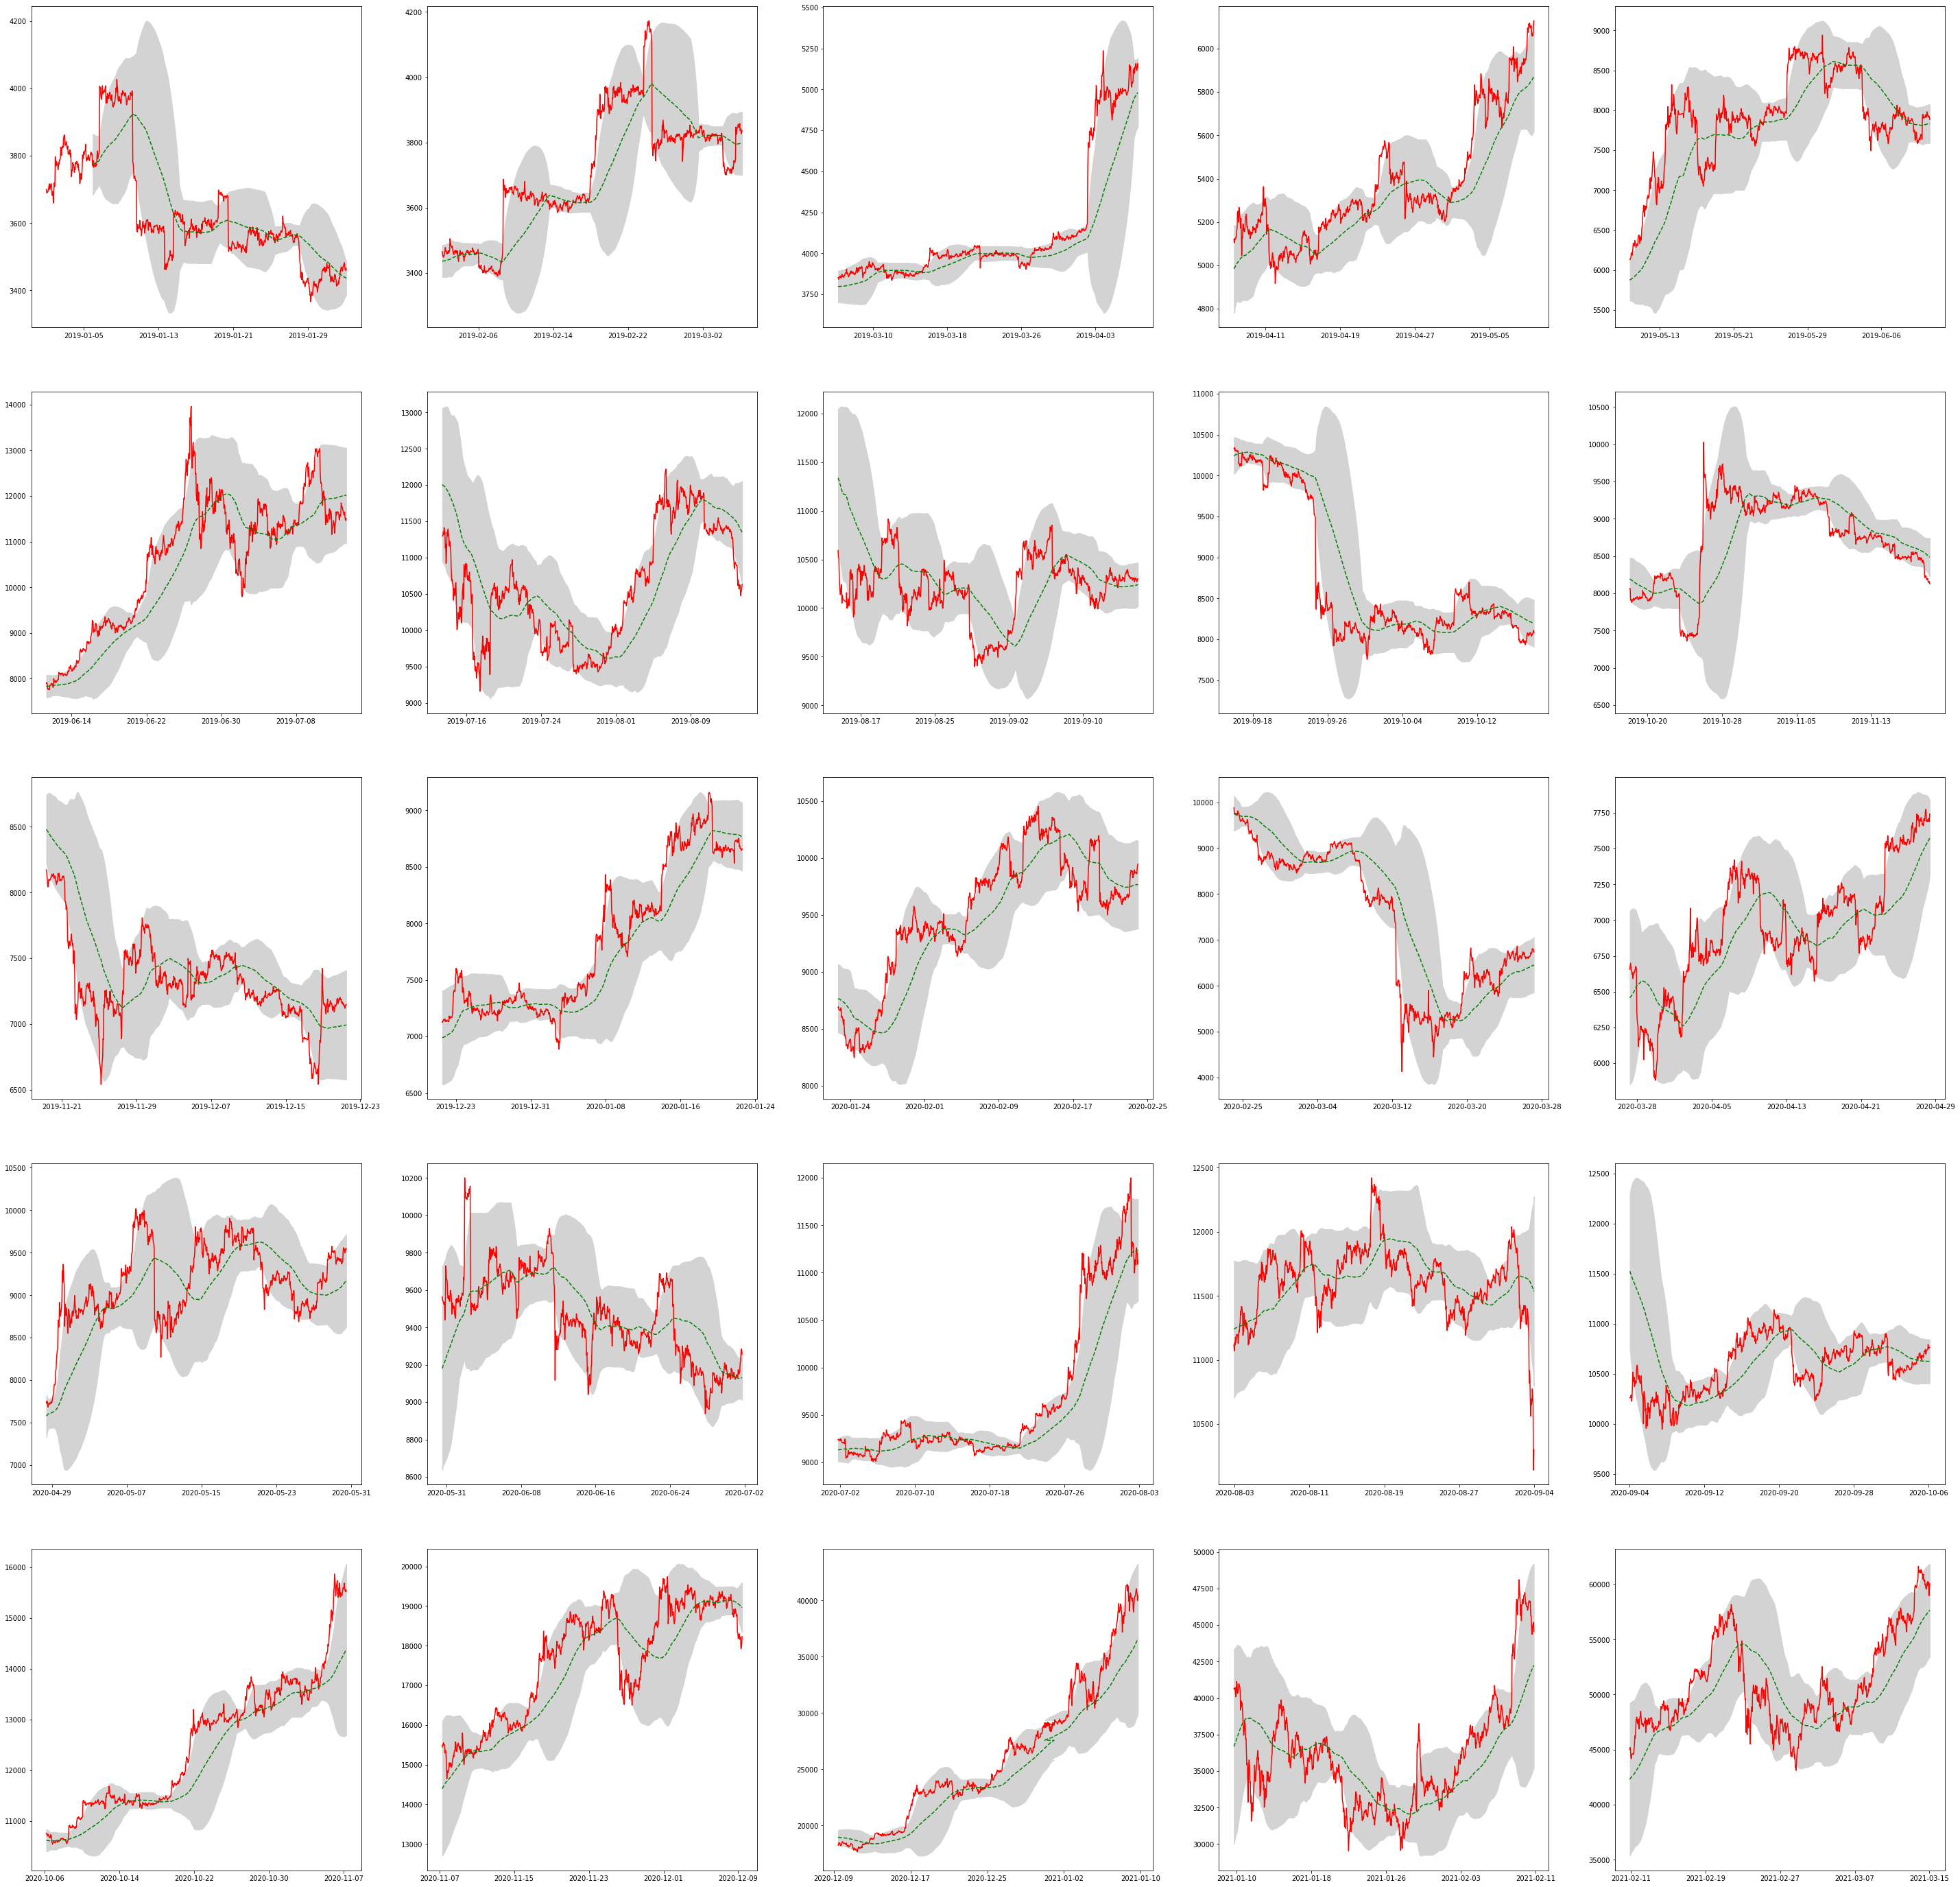

In [ ]:
fig, axs = plt.subplots(5,5, figsize=(50,50))
l = len(whole.close)
unit_size = int(l/25)
start = 0
end = start + unit_size
axs = axs.flatten()
x_axis = whole.index.get_level_values(0)
for ax in axs:
  wc = whole.close[start:end]
  uc = upper[start:end]
  lc = lower[start:end]
  mc = middle[start:end]
  x_a = x_axis[start:end]

  ax.plot(x_a, wc, color = "red")
  ax.plot(x_a, mc, color = "green", ls ="--")
  ax.fill_between(x_a, uc, lc, color='lightgrey')
  ax.xaxis.set_major_locator(plt.MaxNLocator(5))
  
  start = start + unit_size
  end = end + unit_size


No handles with labels found to put in legend.


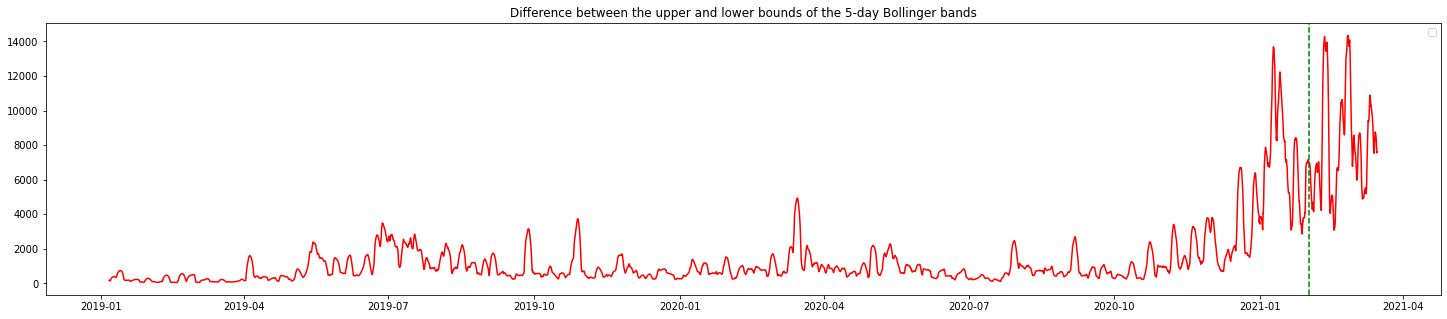

In [ ]:
fig = plt.figure(figsize = (25,5))
plt.title("Difference between the upper and lower bounds of the 5-day Bollinger bands" )
b_differences = upper - lower
plt.plot(x_axis, b_differences, color = "red")
plt.axvline("2021-02-01 00:00:00", c = "green", ls = "--")
plt.legend()

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               ...
               '2021-03-15 10:00:00', '2021-03-15 11:00:00',
               '2021-03-15 12:00:00', '2021-03-15 13:00:00',
               '2021-03-15 14:00:00', '2021-03-15 15:00:00',
               '2021-03-15 16:00:00', '2021-03-15 17:00:00',
               '2021-03-15 18:00:00', '2021-03-15 19:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=19293, freq=None)

#### **GBM**
source: https://towardsdatascience.com/simulating-stock-prices-in-python-using-geometric-brownian-motion-8dfd6e8c6b18


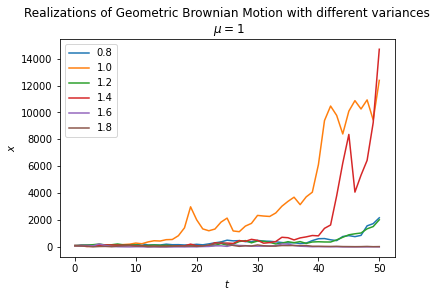

In [ ]:
mu = 1
n = 50
dt = 0.1
x0 = 100
np.random.seed(1)

sigma = np.arange(0.8, 2, 0.2)

x = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(len(sigma), n)).T
)
x = np.vstack([np.ones(len(sigma)), x])
x = x0 * x.cumprod(axis=0)

plt.plot(x)
plt.legend(np.round(sigma, 2))
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.title(
    "Realizations of Geometric Brownian Motion with different variances\n $\mu=1$"
)
plt.show()

In [ ]:

#GBM parameters

# So      : initial stock price <br> 
# dt      : time, incremental unit size <br>
# T       : prediction horizon length <br>
# N       : # of units(time) in the prediction horizon  -> T/dt <br>
# t       : prediction time horizon, array of units <br>
# mu      : mean of historical daily returns <br>
# sigma   : standard deviation of historical daily returns <br>
# b       : array for brownian increaments <br>
# W       : array for brownian path <br>


In [ ]:
lookback_period = whole.loc["2021-01-15 00:00:00":"2021-02-01 00:00:00"]
lookback_period

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2021-01-15 00:00:00,39145.21,39747.76,39023.24,39452.89,3774.330608,1610672399999,1.490154e+08,80654,1813.914332,7.162890e+07,0.0
2021-01-15 01:00:00,39452.89,39640.00,39012.12,39175.74,2907.102569,1610675999999,1.144881e+08,67692,1465.813594,5.773215e+07,0.0
2021-01-15 02:00:00,39175.73,39479.65,38800.00,39267.76,2742.797812,1610679599999,1.075936e+08,68144,1391.220417,5.457140e+07,0.0
2021-01-15 03:00:00,39267.76,39349.58,38450.00,38700.00,3549.506053,1610683199999,1.377763e+08,88794,1751.764550,6.799602e+07,0.0
2021-01-15 04:00:00,38700.00,38853.09,38355.00,38425.83,2792.044100,1610686799999,1.076919e+08,64920,1284.012214,4.953173e+07,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-31 20:00:00,32807.29,32931.55,32461.23,32853.73,2968.315197,1612126799999,9.711966e+07,72031,1330.339259,4.354659e+07,0.0
2021-01-31 21:00:00,32853.73,32899.39,32515.00,32560.73,2336.553165,1612130399999,7.646518e+07,79137,1108.391972,3.627545e+07,0.0
2021-01-31 22:00:00,32561.35,33088.88,32559.85,32974.10,1874.807965,1612133999999,6.163266e+07,60768,888.219223,2.920549e+07,0.0


In [ ]:
whole.loc["2021-02-01 00:00:00"].close.values[0]

32546.27

In [ ]:
S0 = whole.loc["2021-02-01 00:00:00"].close.values[0]
dt = 1 # or 1/24?
T = 7*24  # one week of prediction horizon length
N = T/dt
t = np.arange(1, int(N) + 1)

In [ ]:
returns = (lookback_period.close - lookback_period.close.shift(1)) / lookback_period.close.shift(1)
x = returns.to_list()
x = np.delete(x,0)
mu = np.mean(x)
sigma = np.std(x)

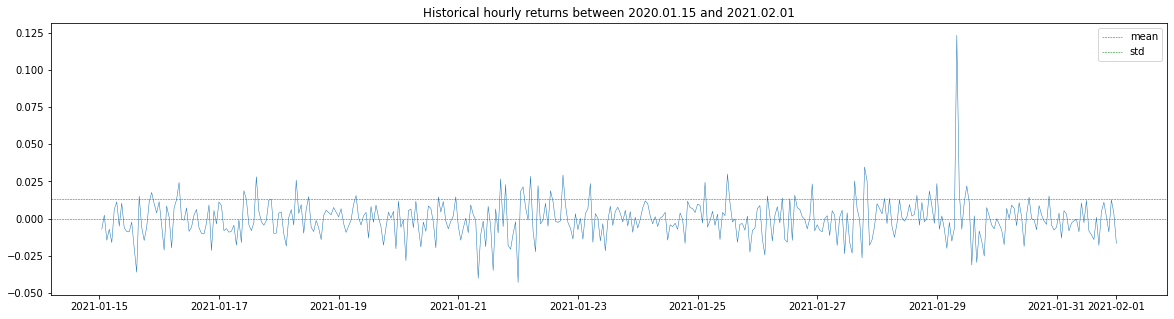

In [ ]:
fig = plt.figure(figsize = (20,5))
plt.title("Historical hourly returns between 2020.01.15 and 2021.02.01")
plt.plot(returns, linewidth = 0.5)

plt.axhline(mu, linewidth = 0.5, color = "red", ls = "--", label = "mean" )
plt.axhline(sigma, linewidth = 0.5, color = "green", ls = "--", label = "std")
plt.legend()

In [ ]:
scen_size = 100
b = {str(scen): np.random.normal(0,1, int(N)) for scen in range(1, scen_size + 1)}

In [ ]:
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}

In [ ]:
drift = (mu - 0.5 * sigma**2) * t
diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}

In [ ]:

S = np.array([S0 * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
S = np.hstack((np.array([[S0] for scen in range(scen_size)]), S))

In [ ]:
len(S[0])

169

In [ ]:
preds = pd.DataFrame(index = pd.date_range(start = "2021-02-01 00:00:00", periods = len(S[0]), freq = "H"))
for col_nr in range(0, scen_size):
  preds["p_"+str(col_nr)] = S[col_nr]

In [ ]:
actual_price = whole.loc["2021-02-01 00:00:00":].close.iloc[:24*14]

In [ ]:
actual_price

timestamp
2021-02-01 00:00:00    32546.27
2021-02-01 01:00:00    33430.29
2021-02-01 02:00:00    33649.73
2021-02-01 03:00:00    33573.97
2021-02-01 04:00:00    33558.25
                         ...   
2021-02-14 20:00:00    48929.50
2021-02-14 21:00:00    48822.66
2021-02-14 22:00:00    49012.94
2021-02-14 23:00:00    48577.79
2021-02-15 00:00:00    48763.62
Name: close, Length: 336, dtype: float64

In [ ]:
len(S[0])

169

In [ ]:
preds.columns.values

array(['p_0', 'p_1', 'p_2', 'p_3', 'p_4', 'p_5', 'p_6', 'p_7', 'p_8',
       'p_9', 'p_10', 'p_11', 'p_12', 'p_13', 'p_14', 'p_15', 'p_16',
       'p_17', 'p_18', 'p_19', 'p_20', 'p_21', 'p_22', 'p_23', 'p_24',
       'p_25', 'p_26', 'p_27', 'p_28', 'p_29', 'p_30', 'p_31', 'p_32',
       'p_33', 'p_34', 'p_35', 'p_36', 'p_37', 'p_38', 'p_39', 'p_40',
       'p_41', 'p_42', 'p_43', 'p_44', 'p_45', 'p_46', 'p_47', 'p_48',
       'p_49', 'p_50', 'p_51', 'p_52', 'p_53', 'p_54', 'p_55', 'p_56',
       'p_57', 'p_58', 'p_59', 'p_60', 'p_61', 'p_62', 'p_63', 'p_64',
       'p_65', 'p_66', 'p_67', 'p_68', 'p_69', 'p_70', 'p_71', 'p_72',
       'p_73', 'p_74', 'p_75', 'p_76', 'p_77', 'p_78', 'p_79', 'p_80',
       'p_81', 'p_82', 'p_83', 'p_84', 'p_85', 'p_86', 'p_87', 'p_88',
       'p_89', 'p_90', 'p_91', 'p_92', 'p_93', 'p_94', 'p_95', 'p_96',
       'p_97', 'p_98', 'p_99'], dtype=object)

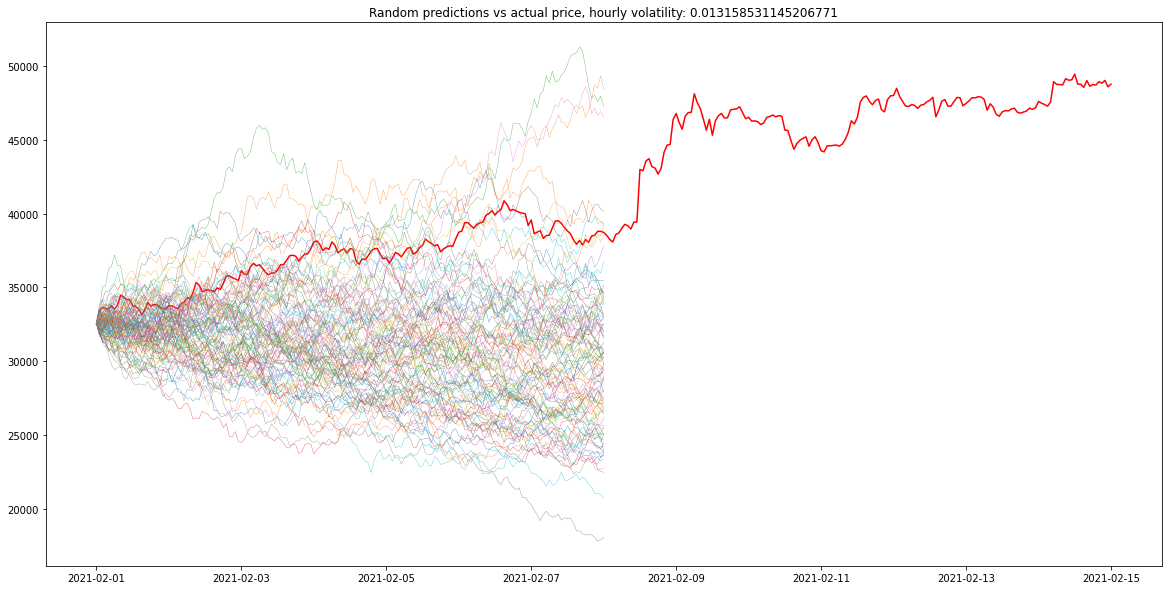

In [ ]:
fig = plt.figure(figsize = (20,10))
plt.title("Random predictions vs actual price, hourly volatility: {}".format(sigma))
plt.plot(actual_price, color = "red")

for col in preds.columns.values:
  plt.plot(preds[col], lw = 0.3)


